# BENCHMARKS

In [160]:
from pandas import DataFrame
from gca.project_types.math_typing import Bound
from gca.algorithms.cagwo import CAGWO
from gca.algorithms.gwo import GWO
from gca.project_types import ObjFunc
from gca.benchmarks.benchmark_functions import (
    F1, F2, F3, F4, F5, F6, F7, F8, F9, FunctionRecord
)
from gca.automaton.neighbormaps import LSHNeighborMap

%load_ext autoreload
%autoreload 2
%matplotlib notebook

population: int = 30

def cagwo_provider(
    obj_function: ObjFunc,
    dimension: int,
    lower_bound: tuple[float, ...],
    upper_bound: tuple[float, ...],
    iterations: int
) -> CAGWO:
    return CAGWO(population, obj_function, dimension, lambda d: LSHNeighborMap(d),
                 Bound(lower_bound, upper_bound), iterations)

def gwo_provider(
    obj_function: ObjFunc,
    dimension: int,
    lower_bound: tuple[float, ...],
    upper_bound: tuple[float, ...],
    iterations: int
) -> GWO:
    return GWO(population, obj_function, dimension, lower_bound, upper_bound, iterations)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [161]:
from gca.benchmarks.benchmark_tools import run_metaheuristic_benchmark, MetaHeuristicBenchmark, to_dataframe

obj_functions: tuple[FunctionRecord, ...] = tuple([F1, F2, F3, F4, F5, F6, F7, F8, F9])
results_cagwo: MetaHeuristicBenchmark = run_metaheuristic_benchmark(
    "CAGWO", cagwo_provider, obj_functions, 30, 200)
results_gwo = MetaHeuristicBenchmark = run_metaheuristic_benchmark(
    "GWO", gwo_provider, obj_functions, 30, 200)

cagwo_df: DataFrame = to_dataframe(results_cagwo)
gwo_df: DataFrame = to_dataframe(results_gwo)

print("CAGWO STATS")
print(cagwo_df)
print("GWO STATS")
print(gwo_df)
cagwo_df.to_csv("./results/cagwo_results.csv", index=False)
gwo_df.to_csv("./results/gwo_results.csv", index=False)

CAGWO STATS
  Function  Dimension  LowerBound  UpperBound           AVG  STD  \
0       F1         30      -10.00   10.000000  4.878642e-34  0.0   
1       F2         30     -100.00  100.000000  0.000000e+00  0.0   
2       F3         30       -1.28    1.280000  2.443525e-02  0.0   
3       F4         30      -32.00   32.000000  3.996803e-15  0.0   
4       F5         30       -5.12    5.120000  0.000000e+00  0.0   
5       F6         30     -500.00  500.000000 -1.256654e+04  0.0   
6       F7         30     -600.00  600.000000  0.000000e+00  0.0   
7       F8         30      -10.00   10.000000  6.156395e-14  0.0   
8       F9         30        0.00    3.141593 -6.862944e+00  0.0   

         MEDIAN           MIN           MAX  
0  4.878642e-34  4.878642e-34  4.878642e-34  
1  0.000000e+00  0.000000e+00  0.000000e+00  
2  2.443525e-02  2.443525e-02  2.443525e-02  
3  3.996803e-15  3.996803e-15  3.996803e-15  
4  0.000000e+00  0.000000e+00  0.000000e+00  
5 -1.256654e+04 -1.256654e+04 -

### CONVERGENCE

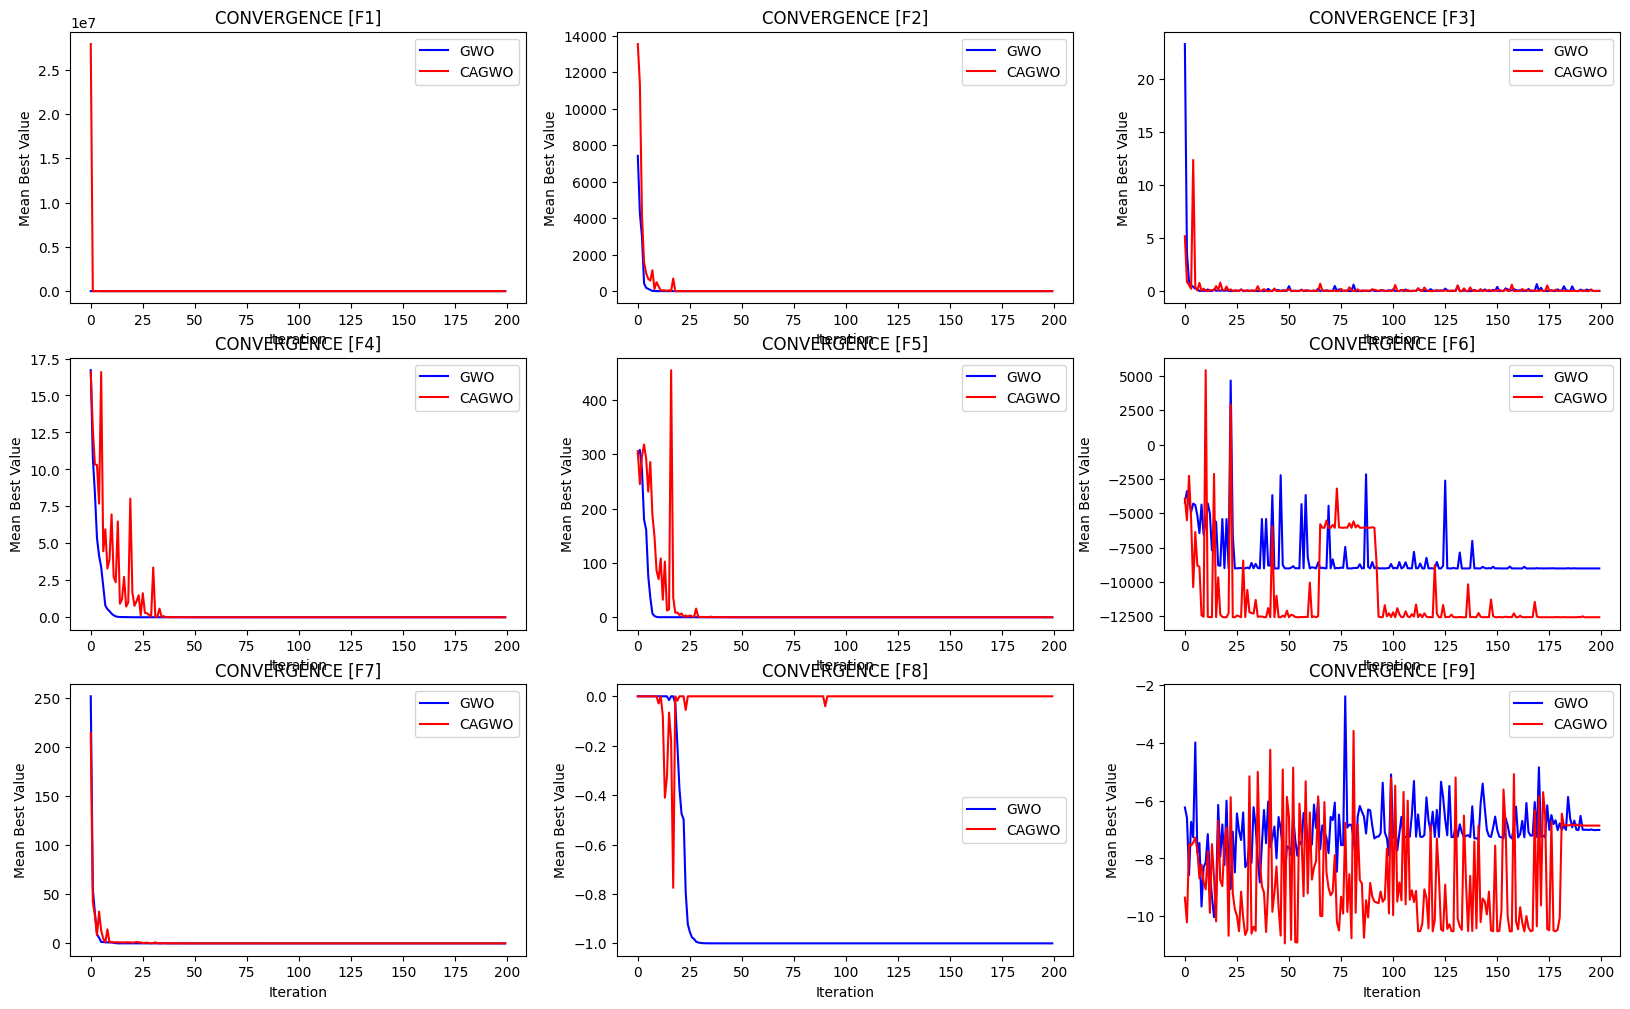

<Figure size 640x480 with 0 Axes>

In [162]:
from matplotlib import pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(3, 3, figsize=(20, 12))

for i, (cagwo_func_benchmark, gwo_func_benchmark) in enumerate(zip(
        results_cagwo.functions_benchmarks, results_gwo.functions_benchmarks)):

    row = i // 3
    col = i % 3

    ax[row, col].set(
        title=f"CONVERGENCE [{results_gwo.functions_benchmarks[i].function.name}]",
        xlabel="Iteration",
        ylabel="Mean Best Value"
    )

    ax[row, col].plot(range(results_gwo.iterations), gwo_func_benchmark.solutions_avg_per_iteration, color="blue", label="GWO")
    ax[row, col].plot(range(results_cagwo.iterations), cagwo_func_benchmark.solutions_avg_per_iteration, color="red", label="CAGWO")
    ax[row, col].legend()

plt.show()
plt.savefig("./results/convergence.png", bbox_inches="tight")